In [1]:
# Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

%matplotlib inline

2023-03-23 19:11:48.049295: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read in data
data = Path("credit_scores.csv")
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [3]:
# Define the features set 'X', and the target 'y' set

# The features dataset consists of columns 0 to 67
X = df.iloc[:, 0:68]

# The target consists of columns 68 and 69
y = df.iloc[:, 68:70]

# View data for the features set
X.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783


In [4]:
# Split the data into traning and testing sets using the train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Scale the data for the features set X_tain and X_test

# Fit the training data to a StandardScaler instance
scaler = StandardScaler().fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the testing data
X_test_scaled = scaler.transform(X_test)

In [6]:
# Create a shallow, 1 hidden layer, neural network

# Instantiate an instance of the Sequential model
nn = Sequential()

# Create 1 hidden layer
nn.add(Dense(units=8, input_dim=68, activation="relu"))

# Create the output layer
nn.add(Dense(units=2, activation="linear"))

# Compile the model 
# Set the parameters as mean_squared_error, adam, and mse.
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

2023-03-23 19:15:00.292722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Fit the model using the training data
model_1 = nn.fit(X_train_scaled, y_train, epochs=800, verbose=0)

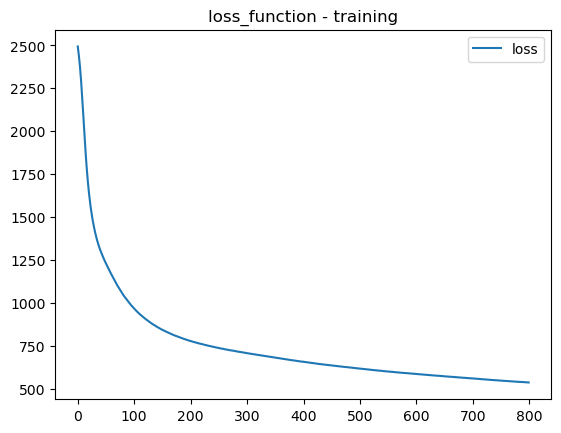

In [8]:
# Plot the train function
plt.plot(model_1.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

In [9]:
# Save model in JSON format
nn_json = nn.to_json()

# Define a relative path to save the model
# The model should be saved with a .json file extension
file_path = Path("model.json")

# Write the model to the the file 
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Define a relative path to save the model weights
# The model weights should be saved with a .h5 file extension
file_path = "model.h5"

# Save the weights to the file path
nn.save_weights(file_path)

In [10]:
# Load the model to predict values

# Identify the relative path of the model's location
file_path = Path("model.json")

# Read in the model and save it as the variable loaded_model
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Identify the relative path for the model's weights
file_path = "model.h5"

# Load the model's weights to the variable loaded_model
loaded_model.load_weights(file_path)

In [11]:
# Predict values using the testing data
y_pred = loaded_model.predict(X_test_scaled)

# View the model's predictions
y_pred[:5, :]

9/9 [==============================] - 0s 1ms/step


array([[21.59737 , 44.87343 ],
       [32.059605, 22.527134],
       [41.035202, 93.46657 ],
       [22.517239, 37.488106],
       [24.874416, 60.28994 ]], dtype=float32)

In [12]:
# Import
from sklearn.metrics import mean_squared_error

# Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

1313.495766565492


In [13]:
import numpy as np

In [14]:
np.sqrt(1313)

36.235341863986875